In [1]:
clinTrial <- read.csv("ANOVAex_Tidy.csv")

In [2]:
library(ggplot2)
options(repr.plot.width = 7, repr.plot.height = 5)

In [4]:
# Dummy Variables / Planned Contrasts
clinTrial$TreatADM <- ifelse(clinTrial$Treatment == "ADM", 1, 0)
clinTrial$TreatCT <- ifelse(clinTrial$Treatment == "CT", 1, 0)

In [6]:
# The Model
ANOVAreg <- lm(BDIscore ~ TreatADM + TreatCT, data = clinTrial)

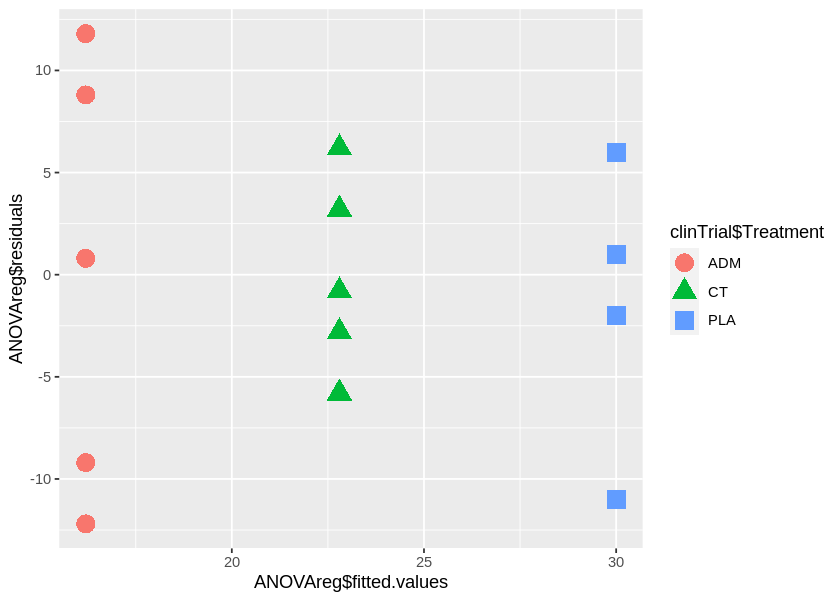

In [10]:
# Plot of the Residuals/Errors
ggplot(mapping = aes(ANOVAreg$fitted.values, y = ANOVAreg$residuals)) +
  geom_point(size = 5,
              aes(colour = clinTrial$Treatment, shape = clinTrial$Treatment))

# Independent Errors / Residuals
- Observations (i.e., rows in your tidy data) are independent of each other.

# Homoscedastic Residuals
- i.e., the variance of the residuals should be constant for all the levels of the predictor.

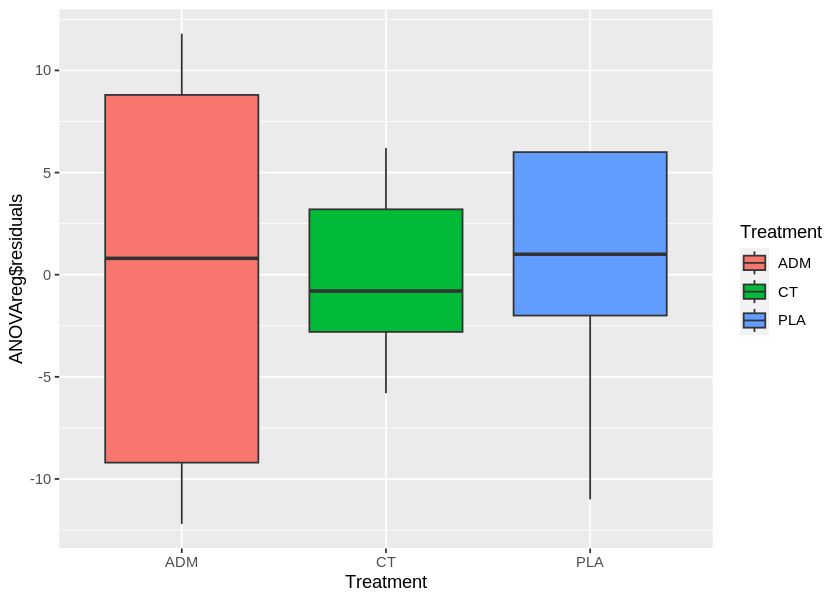

In [11]:
ggplot(clinTrial, aes(x = Treatment, y = ANOVAreg$residuals)) +
  geom_boxplot(aes(fill = Treatment))

### Alternatively: Homogeneity of the Group Variances:
- i.e., Each group/level of your independent variable needs to have the same spread/variance.

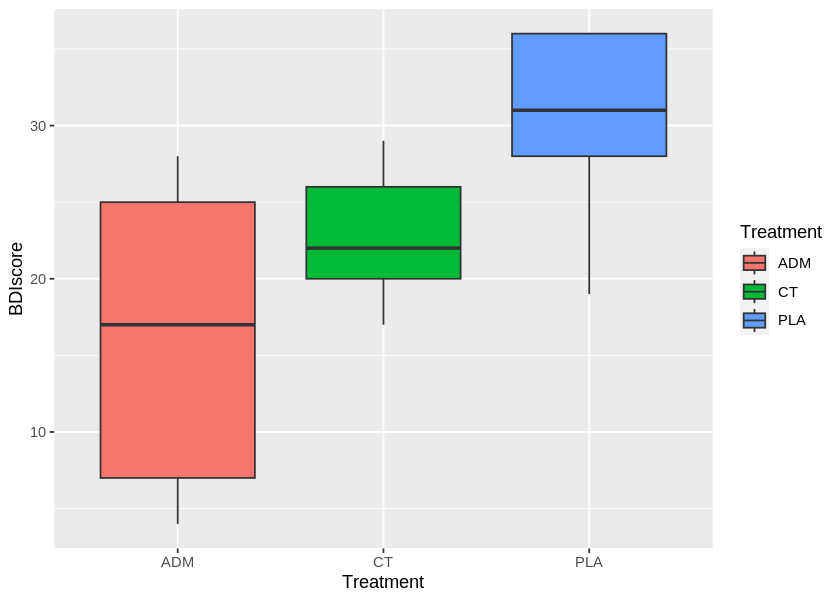

In [12]:
ggplot(clinTrial, aes(x = Treatment, y = BDIscore)) +
  geom_boxplot(aes(fill = Treatment))

**Levene's Test:**

$H_0$: Group variances are equal.

In [13]:
install.packages("car")
library(car)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘numDeriv’, ‘SparseM’, ‘MatrixModels’, ‘minqa’, ‘nloptr’, ‘Rcpp’, ‘RcppEigen’, ‘carData’, ‘abind’, ‘pbkrtest’, ‘quantreg’, ‘lme4’


Loading required package: carData



In [14]:
clinTrial$Treatment <- factor(clinTrial$Treatment)

In [15]:
leveneTest(clinTrial$BDIscore, clinTrial$Treatment, center = median)

,Df,F value,Pr(>F)
,<int>,<dbl>,<dbl>
group,2,1.754319,0.2146079
,12,NA,NA


# Normally Distributed Residuals / Errors with a mean of 0

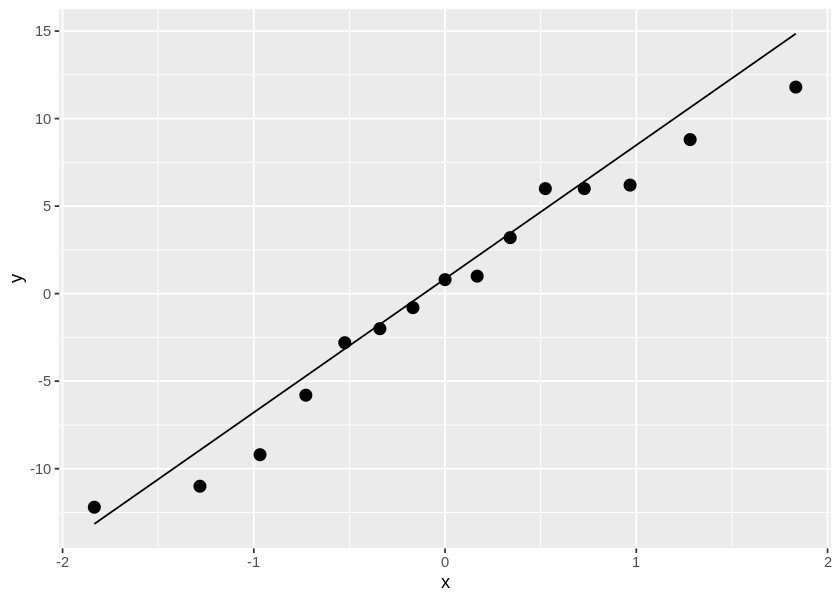

In [17]:
ggplot(clinTrial, aes(sample = ANOVAreg$residuals)) +
  stat_qq(size = 3) +
  stat_qq_line()

### Alternatively: Normally Distributed Group Scores

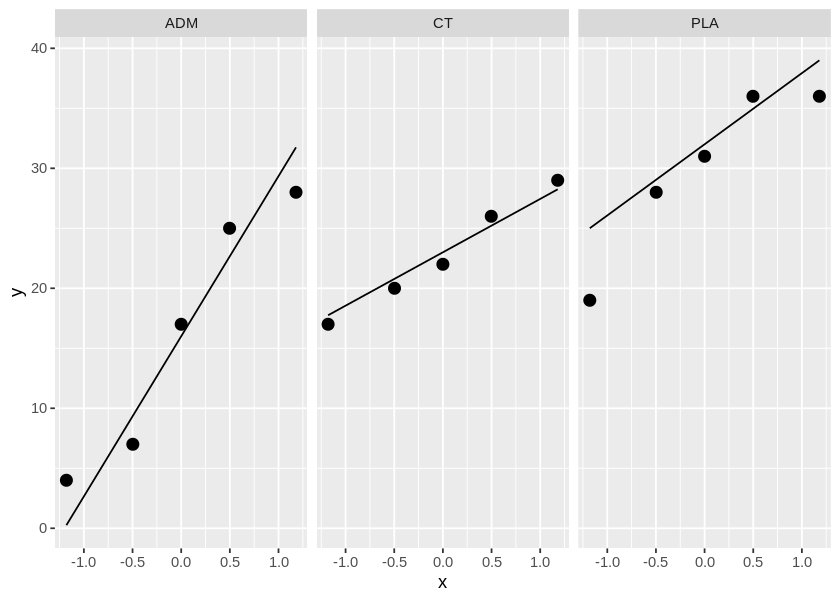

In [19]:
ggplot(clinTrial, aes(sample = BDIscore)) +
  stat_qq(size = 3) +
  stat_qq_line() +
  facet_wrap(~ Treatment)